<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/19_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNN(순환신경망)


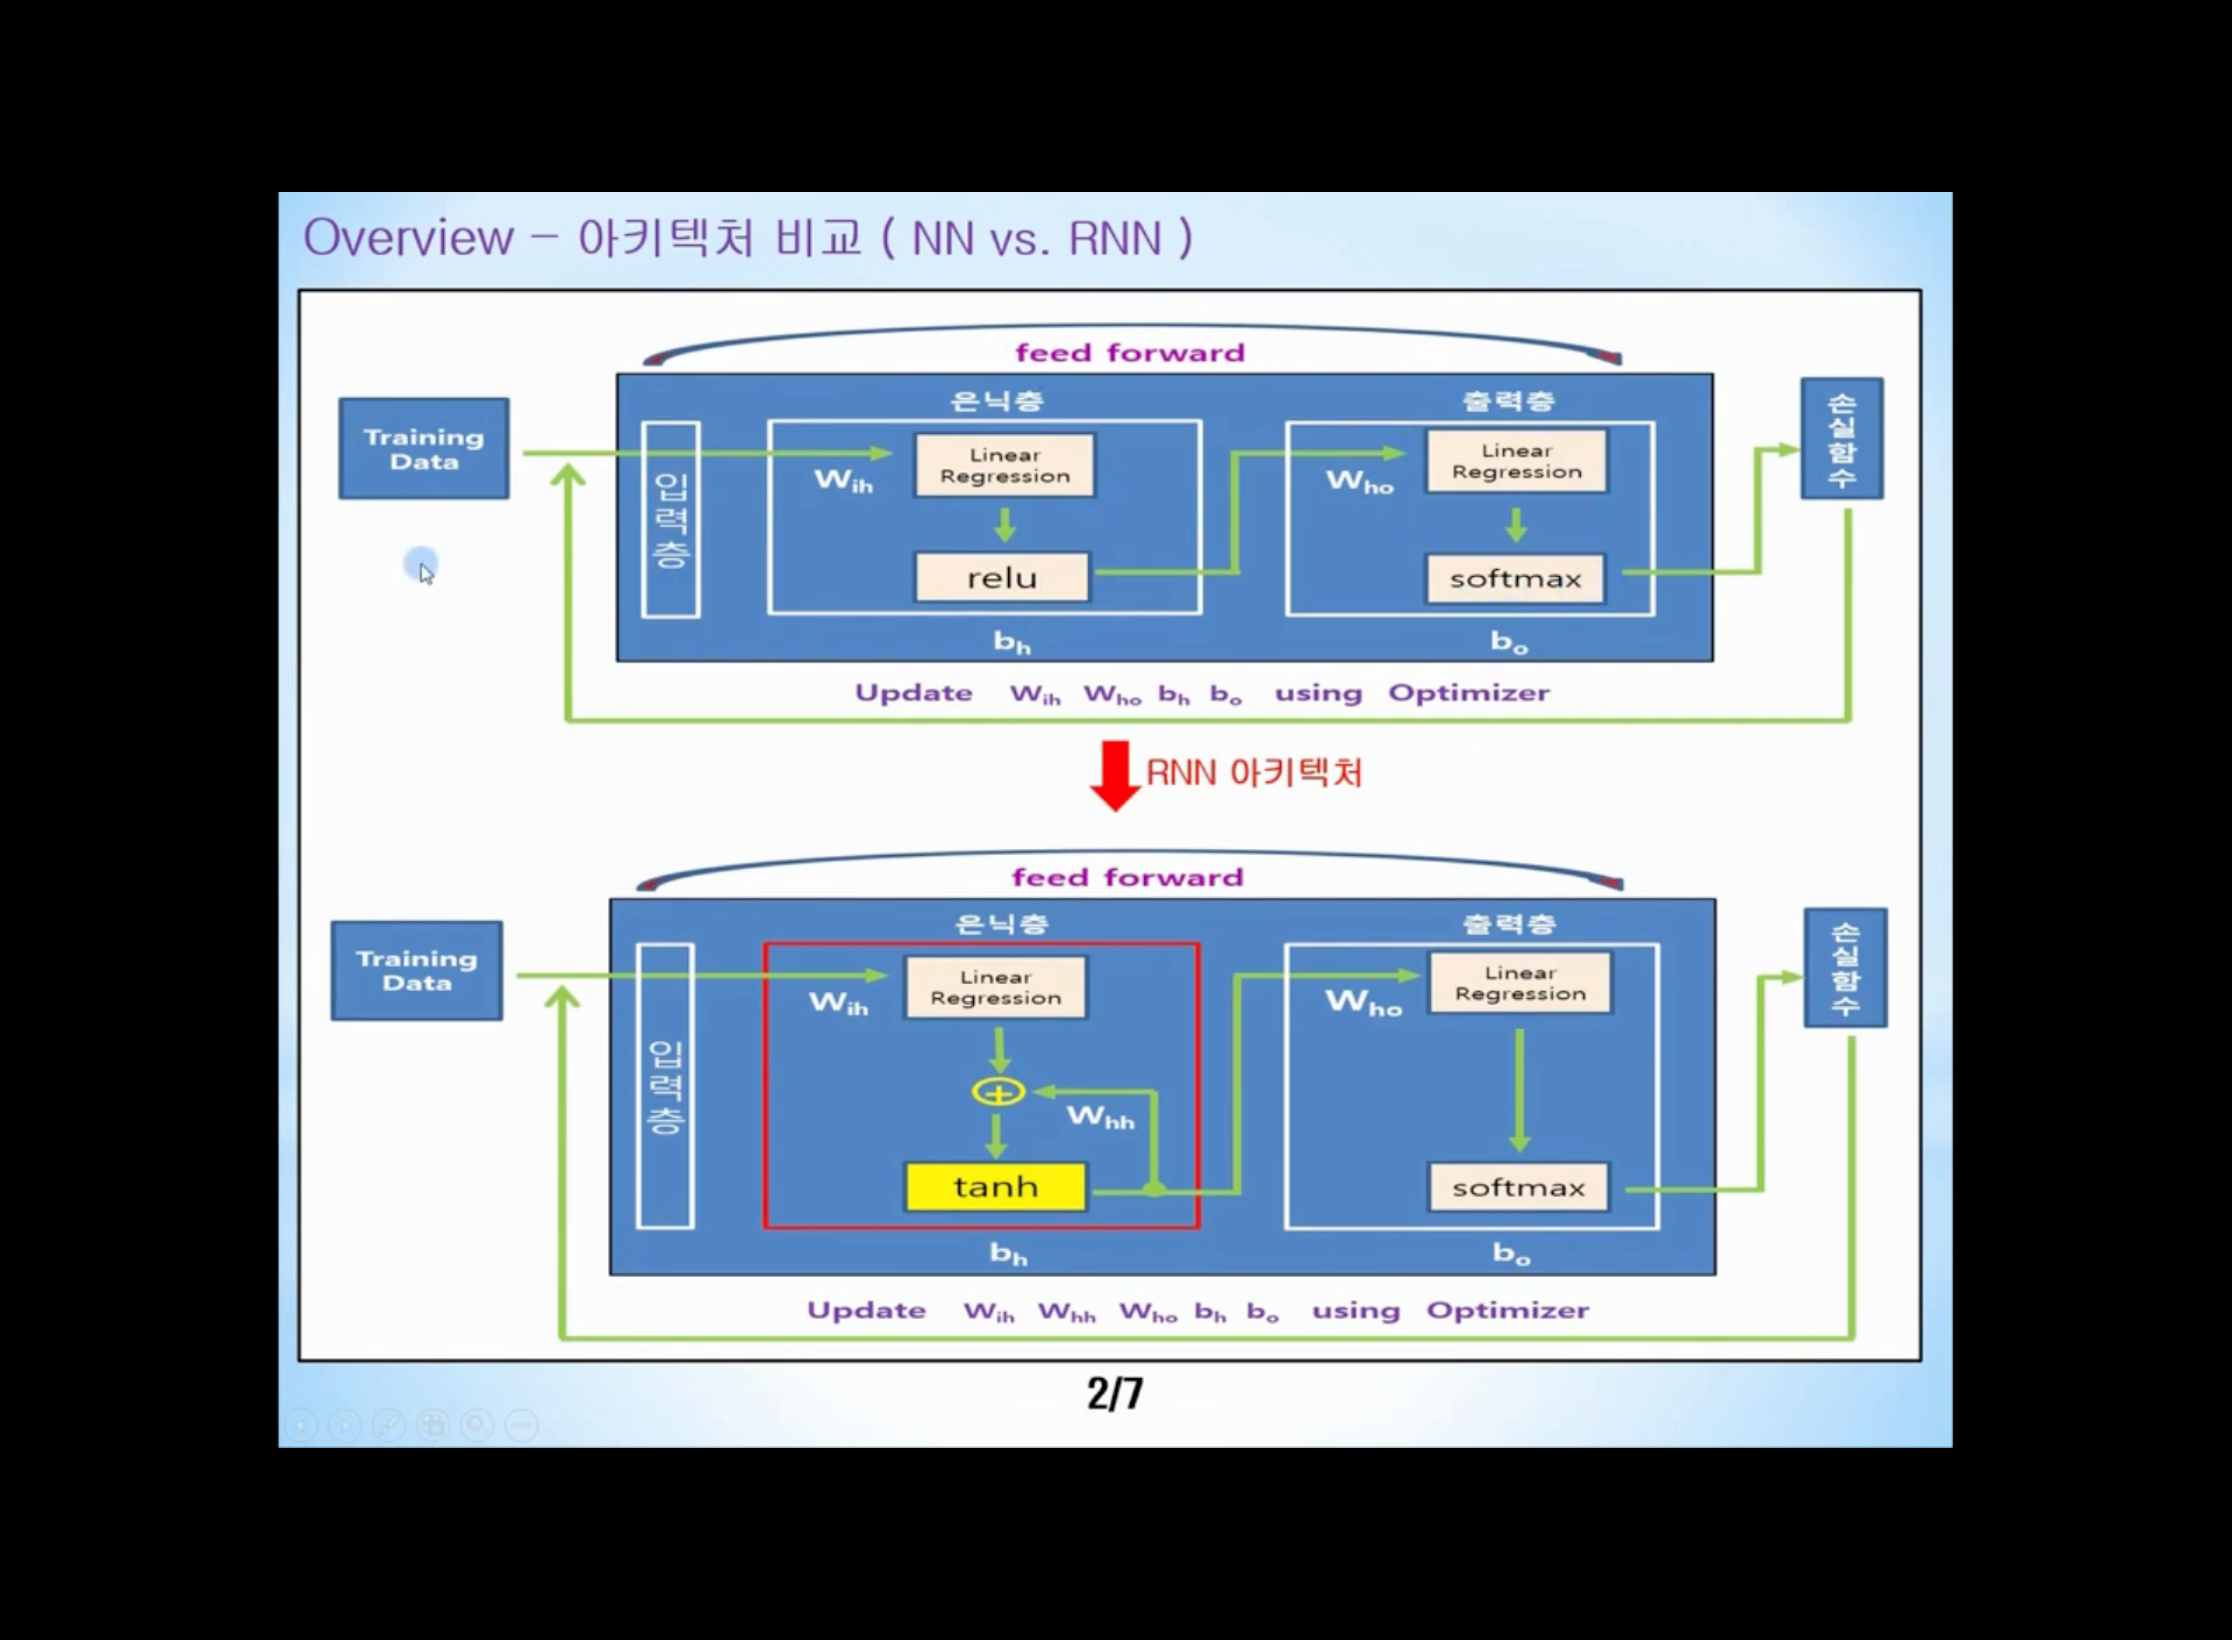

##은닉층 중간에 $W_{hh}$가 존재 하고 있다
- $_{hh}$=tanh
- 중간에 은닉층 내부에 순환되는 구조를 가지고 있다
- 순서가 있는 데이터를 처리하는 데 강점을 가진 신경망

##순서(sequence)가 있는 데이터
- 문장이나 음성 같은 연속적인 데이터 값을 말하는데, 이런 데이터는 문장에서 놓여진 위치(순서)에 따라 의미가  달라지는 것을 알 수 있음
- 즉, 현재 데이터 의미를 알기 위해서는 이전에 놓여 있는 과거 데이터도 알고 있어야 함
  - ex) i work at google / i google at work
  - 나는 구글에서 근무한다 / 나는 회사에서 구글링한다
  - [대명사+동사],[전치사+명사]
- 그래서 RNN은 이러한 과거의 데이터를 알기 위해서
  1. 은닉층내에 순환(Recurrent)구조를 이용하여 과거의 데이터를 기억해 두고 있다가
  2. 새롭게 입력으로 주어지는 데이터와 은닉층에서 기억하고 있는 과거 데이터를 연결 시켜서 그 의미를 알아내는 기능을 가짐




#시계열 데이터 기반의 RNN구조 
- 시계열 데이터를 이용하여 미래 값을 예측하는 RNN구조라면, 다음과 같은 w,h등을 설정하여 일정한 길이로 패턴을 잘라서 학습데이터를 만들어야함

  - 이전 데이터 몇개를 묶는지 나타내는 윈도우 크키 w설정

  - 얼마나 먼 미래값을 예측할 것인지 지정하는 수평선 계수 h 설정

  ex) tf.keras.layers.SimpleRNN(units=10,activation='tanh',input_shape=(3,1))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense

In [4]:
#1000개의 시계열 데이터
x=np.arange(0,100,0.1)
y=0.5*np.sin(2*x)-np.cos(x/2.0)

seq_data=y.reshape(-1,1)

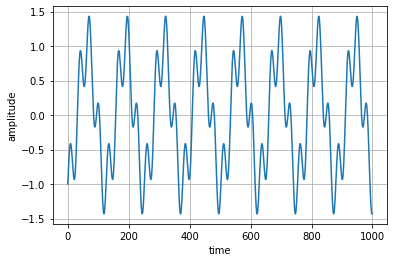

In [6]:
plt.grid()
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [10]:
def seq2dataset(seq,window,horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x)
    Y.append(y)
  return np.array(X),np.array(Y) #np.array를 통하여 3차원 텐서로 변환

w=20
h=1
X,Y=seq2dataset(seq_data,w,h)

print(X.shape,Y.shape)

(980, 20, 1) (980, 1)


In [11]:
split_ratio=0.8

split=int(split_ratio*len(X))

x_train=X[0:split]
y_train=Y[0:split]

x_test=X[split:]
y_test=Y[split:]

In [13]:
model=Sequential()

model.add(SimpleRNN(units=128,
                    activation='tanh',
                    input_shape=(x_train[0].shape)))

model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

hist=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
25/25 [==============================] - 4s 26ms/step - loss: 0.0282 - mae: 0.1259 - val_loss: 0.0067 - val_mae: 0.0708
Epoch 2/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0028 - mae: 0.0417 - val_loss: 0.0015 - val_mae: 0.0308
Epoch 3/100
25/25 [==============================] - 0s 17ms/step - loss: 8.9798e-04 - mae: 0.0235 - val_loss: 5.0086e-04 - val_mae: 0.0167
Epoch 4/100
25/25 [==============================] - 0s 16ms/step - loss: 4.2801e-04 - mae: 0.0151 - val_loss: 3.0401e-04 - val_mae: 0.0128
Epoch 5/100
25/25 [==============================] - 0s 20ms/step - loss: 4.2378e-04 - mae: 0.0158 - val_loss: 4.6972e-04 - val_mae: 0.0173
Epoch 6/100
25/25 [==============================] - 0s 17ms/step - loss: 3.9307e-04 - mae: 0.0155 - val_loss: 3.0667e-04 - val_mae: 0.0136
Epoch 7/100
25/25 [==============================] - 0s 18ms/step - loss: 3.3552e-04 - mae: 0.0144 - val_loss: 4.1446e-04 - val_mae: 0.0165
Epoch 8/100
25/25 [=================

In [16]:
pred=model.predict(x_test)
print(pred.shape)

(196, 1)


In [18]:
rand_idx=np.random.randint(0,len(y_test),size=5)

print('\nrandidx:',rand_idx,'\n')
print('pred:',pred.flatten()[rand_idx])
print('label:',y_test.flatten()[rand_idx])

rand_idx=np.random.randint(0,len(y_test),size=5)

print('\nrandidx:',rand_idx,'\n')
print('pred:',pred.flatten()[rand_idx])
print('label:',y_test.flatten()[rand_idx])
#거의 비슷한 값이 나타난다


randidx: [ 62 109 185  77  72] 

pred: [-0.97060853  0.29114282 -0.61931896 -0.85475636 -1.304904  ]
label: [-0.97653273  0.28575077 -0.62549374 -0.86395236 -1.31656223]

randidx: [ 90 162 113 181 124] 

pred: [-0.6299431  -0.1008677   0.759245   -0.11210349  0.62864906]
label: [-0.6195763  -0.11546574  0.75630552 -0.12930711  0.62745578]


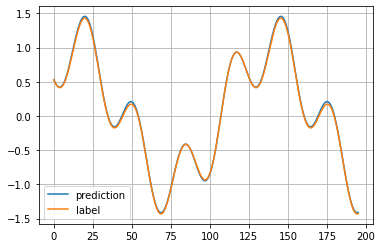

In [20]:
plt.plot(pred,label='prediction')
plt.plot(y_test,label='label')
plt.grid()
plt.legend(loc='best')

plt.show()